
Load the 'Titanic' dataset from seaborn and display the first 5 rows.

In [5]:
import seaborn as sns
import pandas as pd
x = sns.load_dataset("titanic")
x.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Fill the missing age values with the median age value. Confirm no missing values in the 'age' column.

In [6]:
x['age']=x['age'].fillna(x['age'].median())
x.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Add a new column 'age_group' which categorizes passengers as 'Child' (age <= 18), 'Adult' (18 < age <= 60), and 'Senior' (age > 60).

In [7]:
x['age_group']=pd.cut(x['age'],bins=[0,18,60,x['age'].max()],labels=["Child","Adult","Senior"])
x.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult


Visualize the distribution of 'age_group' using a countplot.

<Axes: xlabel='age_group', ylabel='count'>

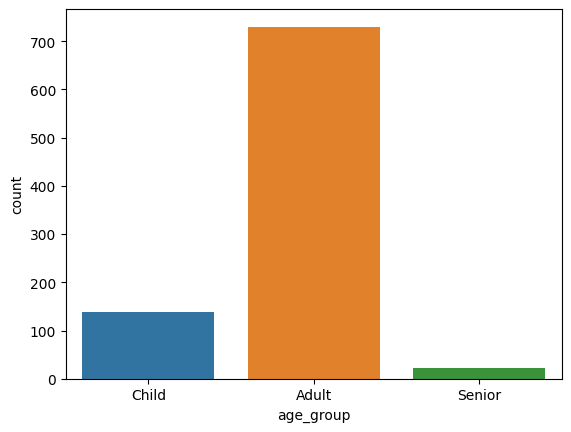

In [8]:
sns.countplot(x="age_group",data=x)

Compute and visualize the survival rate by 'age_group' using a bar plot.

In [9]:
x

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,Adult
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,Adult
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,Adult
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,Adult


<Axes: xlabel='age_group'>

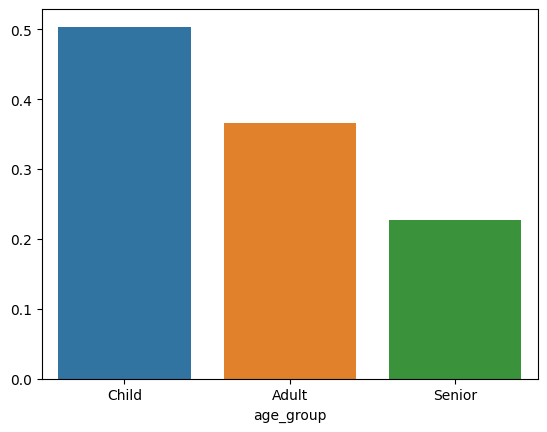

In [14]:
sur_age_grup=x.groupby("age_group")['survived'].mean()
sns.barplot(x=sur_age_grup.index,y=sur_age_grup.values)

Compute and visualize the survival rate by 'age_group' and 'sex' using a bar plot.

<Axes: xlabel='age_group'>

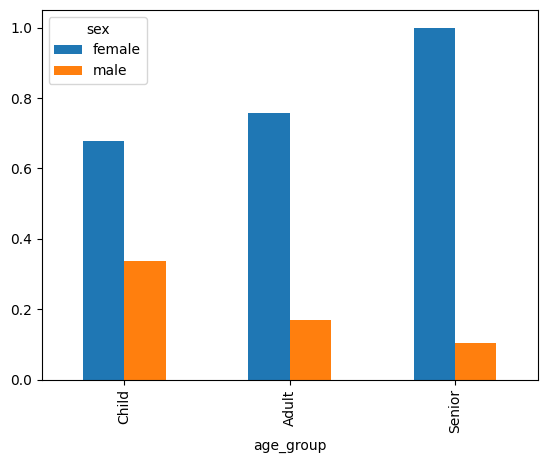

In [18]:
sur_age_grup_and_sex=x.groupby(["age_group","sex"])['survived'].mean().unstack()
sur_age_grup_and_sex.plot(kind="bar")

In [19]:
len(x)

891

Create a pivot table to summarize the mean survival rate by 'sex' and 'class'.

In [21]:
pivott=x.pivot_table("survived",index="sex",columns="class")
pivott

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Visualize the pivot table from the previous exercise using a heatmap.

<Axes: xlabel='class', ylabel='sex'>

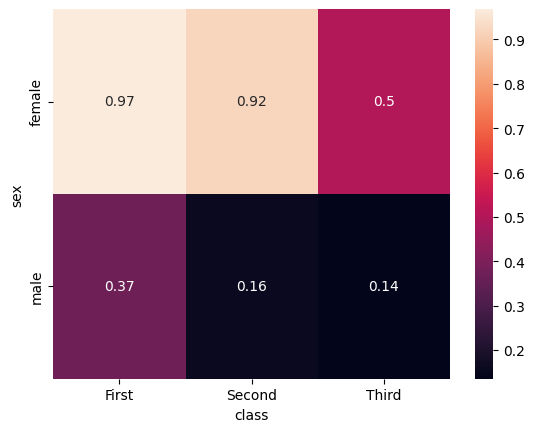

In [23]:
sns.heatmap(pivott,annot=True)

Create a 'fare_group' feature based on the quartiles of 'fare'. Then, compute and visualize the survival rate by 'fare_group' using a bar plot.

In [24]:
x

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,Adult
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,Adult
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,Adult
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,Adult


In [25]:
x['fare_group']=pd.qcut(x['fare'],q=4,labels=['Q1','Q2','Q3','Q4'])
x.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,fare_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Adult,Q1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult,Q4
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Adult,Q2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult,Q4
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult,Q2


<Axes: xlabel='fare_group'>

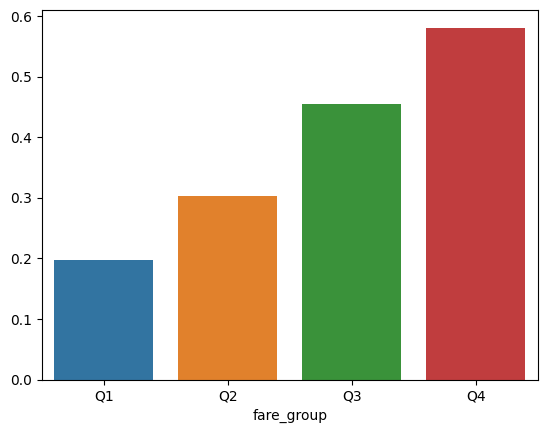

In [26]:
sur_age_grup_fare=x.groupby("fare_group")['survived'].mean()
sns.barplot(x=sur_age_grup_fare.index,y=sur_age_grup_fare.values)

Plot a pairplot of the numerical features in the Titanic dataset, colored by 'survived'.

In [27]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  age_group    891 non-null    category
 16  fare_group   891 non-null    category
dtypes: bool(2), category(4), float64(2), int64(4), object(5)
memory usage: 82

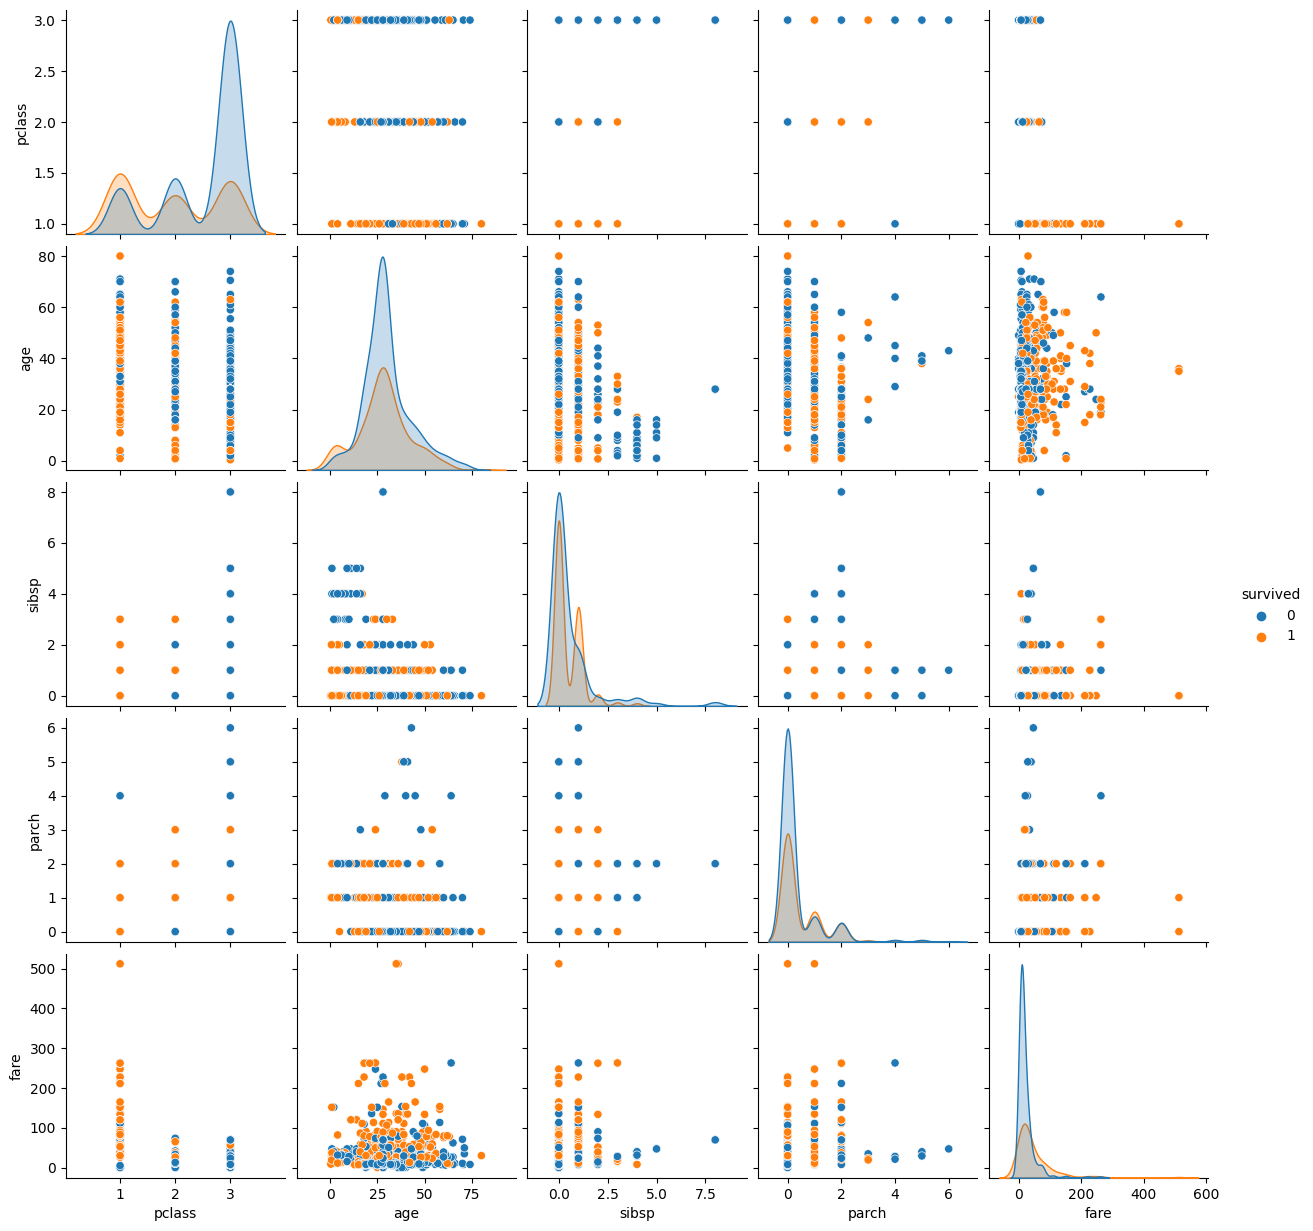

In [29]:
sns.pairplot(x[['survived','pclass','age','sibsp','parch','fare']],hue='survived')


Create a new column named 'FamilySize' which will be the sum of 'sibsp' and 'parch' plus one (for the person themselves). Show the first 5 rows of the updated dataset.

In [30]:
x['FamilySize']=x['parch']+x['sibsp']+1
x.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,fare_group,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Adult,Q1,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult,Q4,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Adult,Q2,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult,Q4,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult,Q2,1


Find the survival rate for different family sizes and visualize it using a line plot.

In [32]:
survided_family=x.groupby('FamilySize')['survived'].mean()
survided_family

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: survived, dtype: float64

<Axes: xlabel='FamilySize'>

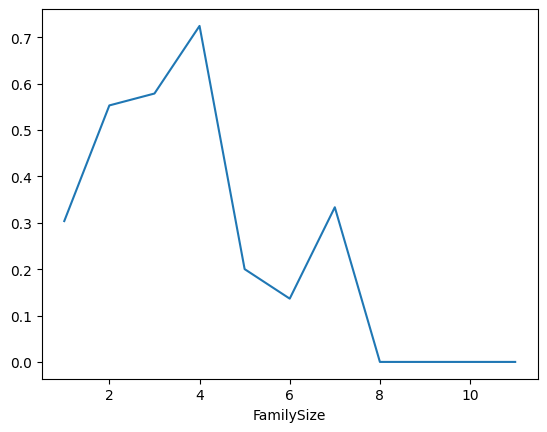

In [33]:
sns.lineplot(x=survided_family.index,y=survided_family.values)

Create a new column 'IsAlone'. If 'FamilySize' is 1, 'IsAlone' should be 1, otherwise it should be 0. Show the first 5 rows of the updated dataset.

In [34]:
x['IsAlone']=0
x.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,fare_group,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Adult,Q1,2,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult,Q4,2,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Adult,Q2,1,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult,Q4,2,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult,Q2,1,0


In [35]:
x.loc[x['FamilySize']==1,'IsAlone']=1
x.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,fare_group,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Adult,Q1,2,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult,Q4,2,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Adult,Q2,1,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult,Q4,2,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult,Q2,1,1


compute the survival rate for those who were alone and those who were not. Visualize it using a bar plot.

<Axes: xlabel='IsAlone'>

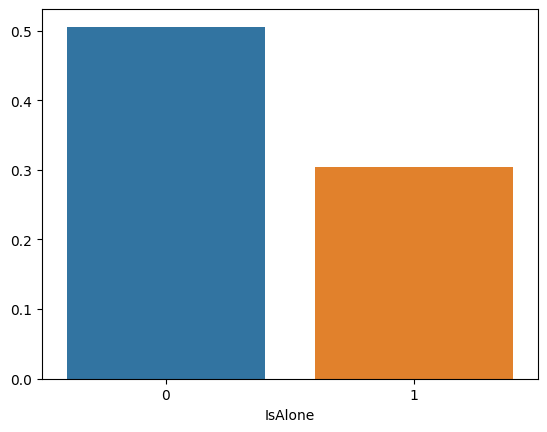

In [36]:
sur_alone=x.groupby("IsAlone")['survived'].mean()
sns.barplot(x=sur_alone.index,y=sur_alone.values)

Create a correlation matrix for the titanic dataset and visualize it using a heatmap.

<ipython-input-39-194d5e991f9b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=x.corr()


<Axes: >

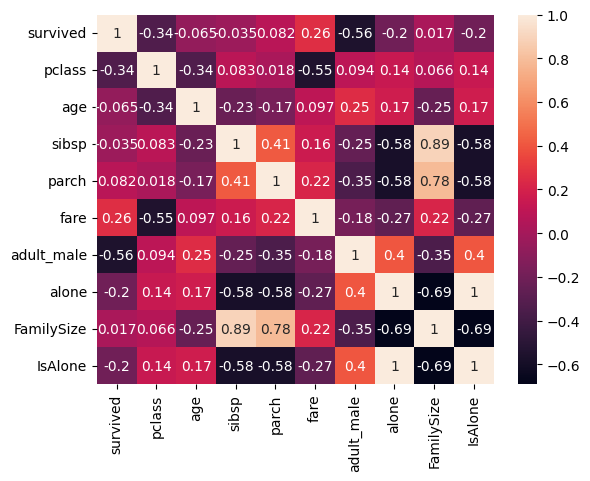

In [39]:
corr=x.corr()
sns.heatmap(corr,annot=True)

Calculate the average survival rate for each level of 'pclass' and 'sex'. Use GroupBy and aggregate function.

In [40]:
pcalss=x.groupby(['pclass','sex'])['survived'].mean()
pcalss

pclass  sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: survived, dtype: float64

Plot a pairplot of the numerical features in the Titanic dataset, colored by 'IsAlone'.

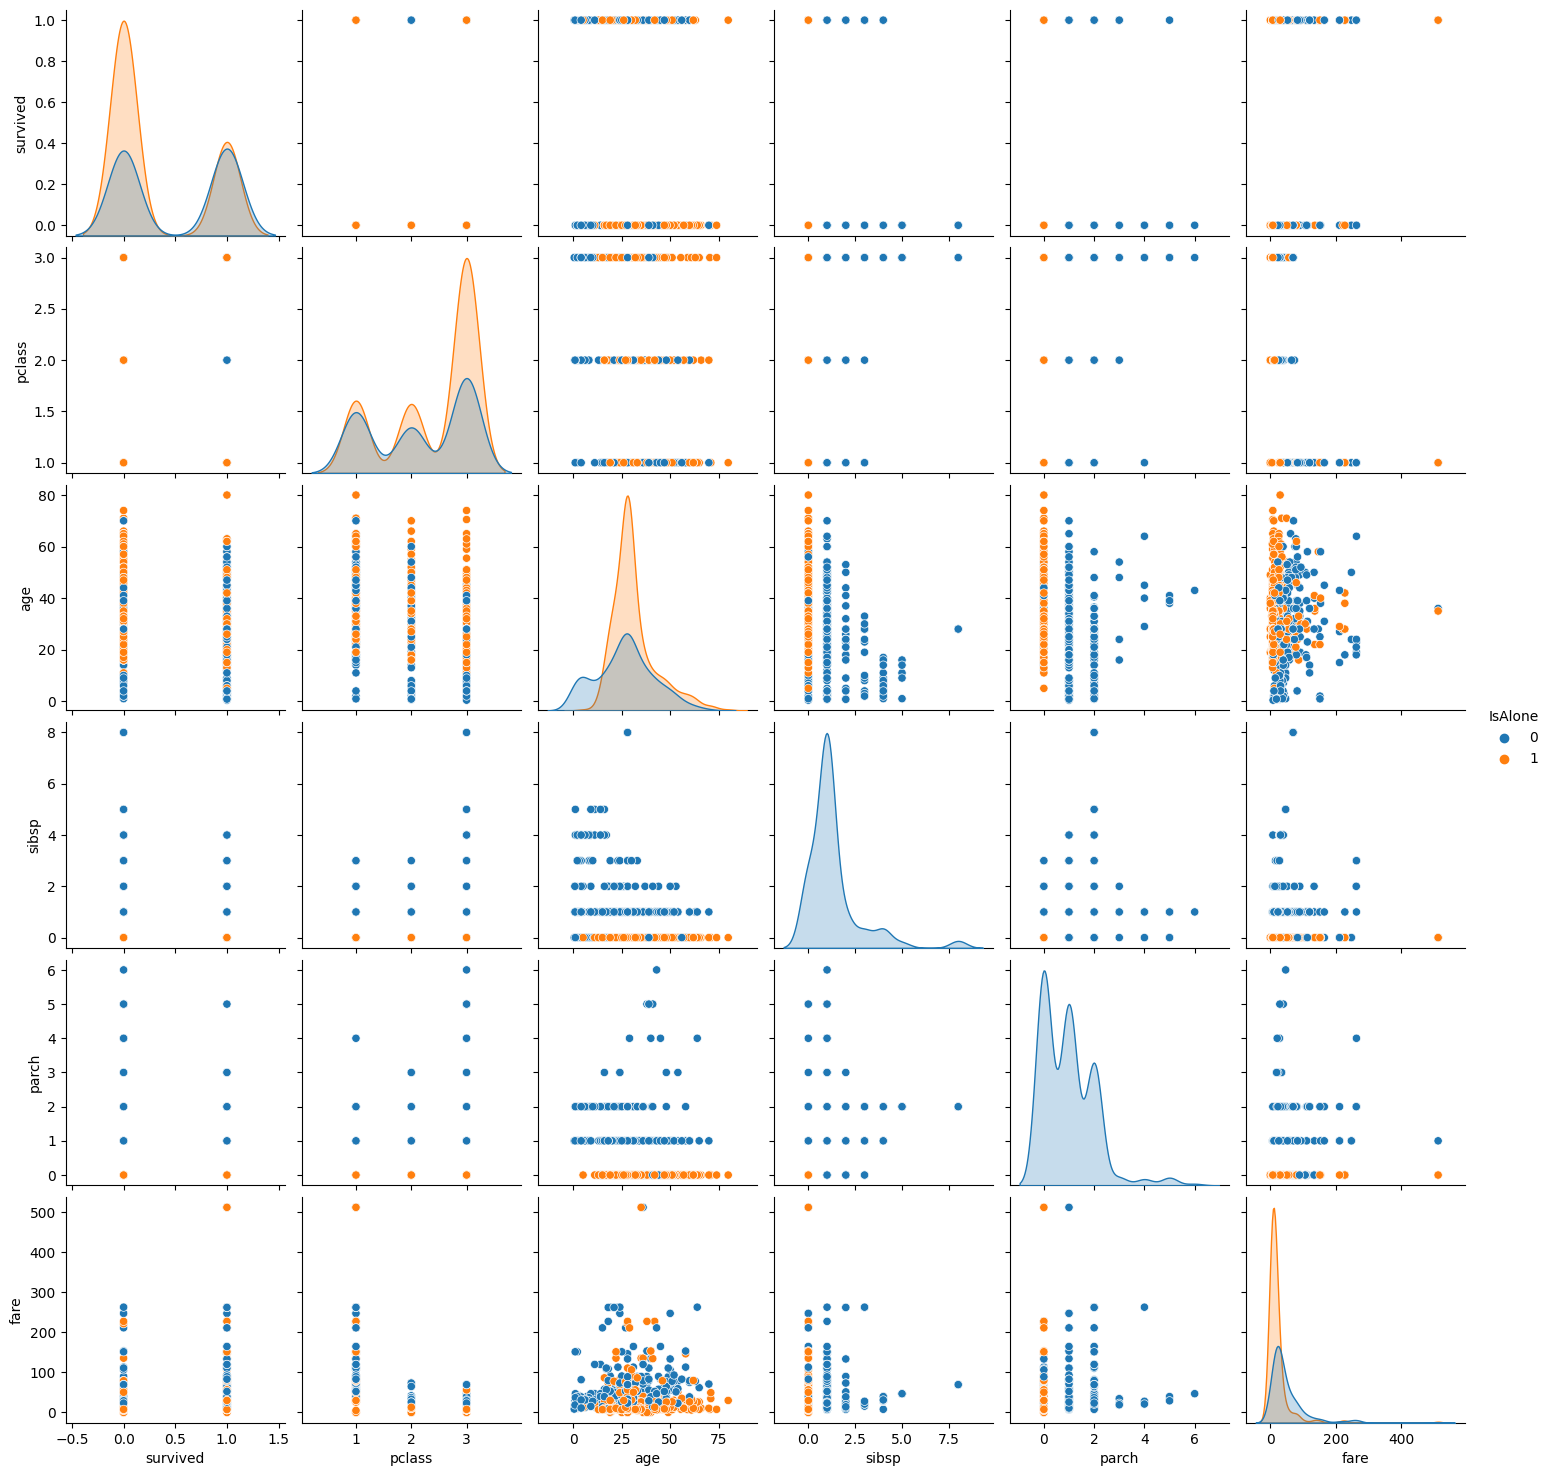

In [45]:
sns.pairplot(x[['IsAlone','survived','pclass','age','sibsp','parch','fare']],hue='IsAlone')